### Importing necessary libraries

In [1]:
from scipy.io import arff
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import ecg_plot

import heartpy as hp

import sklearn.preprocessing as sk_preprocess

import sklearn.decomposition as sk_decomp

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

#from sklearn.preprocessing import MultiLabelBinarizer

C:\Users\vivek\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\vivek\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\vivek\anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


### Read data

In [2]:
data = pd.DataFrame(arff.loadarff('ECG5000_TRAIN.arff')[0])

In [3]:
data_array=np.array(data)

In [4]:
data

,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,...,att132,att133,att134,att135,att136,att137,att138,att139,att140,target
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,b'1'
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,b'1'
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,b'1'
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,b'1'
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,b'1'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,-0.478577,-1.779959,-2.398159,-3.170112,-3.559732,-3.573956,-2.989770,-2.270605,-1.688277,-1.359872,...,1.160885,1.456331,2.209421,2.507175,2.198534,1.705849,1.492642,1.561890,1.520161,b'4'
496,-1.325210,-2.480992,-2.965356,-3.342392,-3.176351,-2.891528,-2.369679,-1.598750,-1.071751,-0.891843,...,-0.172154,-0.864803,-1.549854,-2.460243,-3.366562,-3.466546,-2.718380,-1.855209,-1.539958,b'4'
497,-0.021964,-0.912434,-1.903353,-2.662829,-3.122156,-3.451490,-3.392982,-2.929937,-2.256294,-1.690706,...,1.339479,1.457995,2.128078,2.630759,2.295748,1.764967,1.444280,1.432347,1.457028,b'4'
498,0.288011,-1.098020,-2.500250,-3.598599,-3.650608,-3.281587,-2.231601,-1.250656,-1.072574,-0.434310,...,-0.029242,0.071414,0.118161,-0.071967,-0.171214,0.131211,0.049872,0.010915,-0.081534,b'5'


In [5]:
data['target']=data['target'].map(dict({b'1': 0, b'2': 1, b'3': 2, b'4': 3, b'5': 4}))

### Function to OneHotEncode the target labels

In [6]:
def oheColumn(oheData, columnName):
    oneHotEnc = sk_preprocess.OneHotEncoder(dtype=int, handle_unknown='ignore')

    oheDataColumn = oneHotEnc.fit_transform(oheData[[columnName]]).toarray()

    oheData[oneHotEnc.categories_[0]] = oheDataColumn

    for catCol in oneHotEnc.categories_[0]:
        oheData.rename(columns = {catCol:columnName+'_'+catCol}, inplace = True)
    
    return oheData

In [7]:
y = data['target']
X = data.drop('target', axis=1)

In [8]:
data.isna().sum()

att1      0
att2      0
att3      0
att4      0
att5      0
         ..
att137    0
att138    0
att139    0
att140    0
target    0
Length: 141, dtype: int64

In [9]:
data.isna().sum().sum()

0

### Plot the ECG data

In [10]:
import warnings
warnings.filterwarnings('ignore')

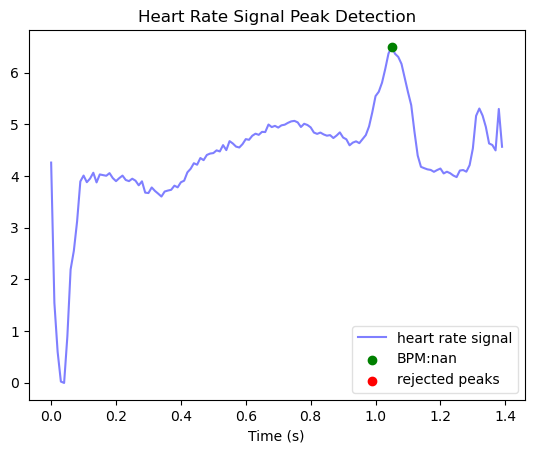

In [11]:
working_data, measures = hp.process(np.delete(data_array[0], -1), 100.0)
hp.plotter(working_data, measures)

### Correlation of features

In [12]:
data_corr=data.corr()

In [13]:
correlated_features=data_corr[(data_corr > 0.3) | (data_corr < -0.3)].stack().index
correlated_features_df=pd.DataFrame(correlated_features)
correlated_features_df=pd.DataFrame(correlated_features_df[0].tolist(),index=correlated_features_df.index)
correlated_features_df=correlated_features_df[correlated_features_df.loc[:,0] != correlated_features_df.loc[:,1]]

In [14]:
correlated_features_df

,0,1
1,att1,att2
2,att1,att3
3,att1,att4
4,att1,att96
5,att1,att97
...,...,...
9603,target,att135
9604,target,att136
9605,target,att137
9606,target,att138


The features are highly correlated as seen this result. It shows the correlations where **|correlation between features|>0.3**.

### Split data into test and train data

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

### Standardizing features to reduce bias

In [16]:
def standardize(data):
    sc = sk_preprocess.StandardScaler()
    return sc.fit_transform(data)
 
X_train_sc_processed = standardize(X_train)
X_test_sc_processed = standardize(X_test)

### Applying PCA

In [17]:
pca = sk_decomp.PCA(n_components=30)

def pcaFitData(data):
    return pca.fit_transform(data)
    
def pcaTransformData(data):
    return pca.transform(data)

def pcaRetrieveVariance():
    return pca.explained_variance_ratio_

In [18]:
X_train_processed = pcaFitData(X_train_sc_processed)
X_test_processed = pcaTransformData(X_test_sc_processed)
 
explained_variance = pcaRetrieveVariance()

### Performing Logistic regression for Multiclass classification

In [19]:
logisticRegModel = LogisticRegression()

def logisticFit(X, y):
    return logisticRegModel.fit(X, y)

logisticRegModel_trained = logisticFit(X_train_processed, y_train)

>Name:20 	Mean of Scores:0.891 (Scores:0.050)
>Name:21 	Mean of Scores:0.889 (Scores:0.053)
>Name:22 	Mean of Scores:0.904 (Scores:0.051)
>Name:23 	Mean of Scores:0.904 (Scores:0.056)
>Name:24 	Mean of Scores:0.893 (Scores:0.050)
>Name:25 	Mean of Scores:0.896 (Scores:0.051)
>Name:26 	Mean of Scores:0.900 (Scores:0.048)
>Name:27 	Mean of Scores:0.896 (Scores:0.048)
>Name:28 	Mean of Scores:0.898 (Scores:0.051)
>Name:29 	Mean of Scores:0.898 (Scores:0.051)


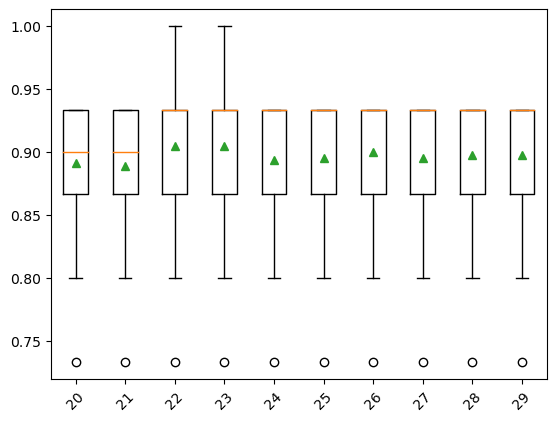

In [20]:
# compare pca number of components with logistic regression algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot

# get a list of models to evaluate
def get_models(X):
    models = dict()
    for i in range(20,min(50, X.shape[1])):
        steps = [('pca', PCA(n_components=i)), ('m', LogisticRegression())]
        models[str(i)] = Pipeline(steps=steps)
    return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores

def evaluatePCA(X, y):
    # get the models to evaluate
    models = get_models(X)
    # evaluate the models and store results
    results, names = list(), list()
    for name, model in models.items():
        scores = evaluate_model(model, X, y)
        results.append(scores)
        names.append(name)
        print('>Name:%s \tMean of Scores:%.3f (Scores:%.3f)' % (name, mean(scores), std(scores)))
    # plot model performance for comparison
    pyplot.boxplot(results, labels=names, showmeans=True)
    pyplot.xticks(rotation=45)
    pyplot.show()
    
evaluatePCA(X_test_processed, y_test)

### Shuffling columns and applying PCA

In [21]:
def shuffleColumns(data):
    return data[np.random.default_rng(seed=42).permutation(data.columns.values)]
X_test_shuffled = shuffleColumns(X_test)

>Name:20 	Mean of Scores:0.904 (Scores:0.051)
>Name:21 	Mean of Scores:0.900 (Scores:0.048)
>Name:22 	Mean of Scores:0.900 (Scores:0.048)
>Name:23 	Mean of Scores:0.900 (Scores:0.048)
>Name:24 	Mean of Scores:0.902 (Scores:0.048)
>Name:25 	Mean of Scores:0.902 (Scores:0.048)
>Name:26 	Mean of Scores:0.904 (Scores:0.051)
>Name:27 	Mean of Scores:0.902 (Scores:0.048)
>Name:28 	Mean of Scores:0.902 (Scores:0.048)
>Name:29 	Mean of Scores:0.904 (Scores:0.051)
>Name:30 	Mean of Scores:0.904 (Scores:0.051)
>Name:31 	Mean of Scores:0.904 (Scores:0.051)
>Name:32 	Mean of Scores:0.902 (Scores:0.051)
>Name:33 	Mean of Scores:0.902 (Scores:0.051)
>Name:34 	Mean of Scores:0.900 (Scores:0.054)
>Name:35 	Mean of Scores:0.900 (Scores:0.051)
>Name:36 	Mean of Scores:0.904 (Scores:0.054)
>Name:37 	Mean of Scores:0.907 (Scores:0.050)
>Name:38 	Mean of Scores:0.904 (Scores:0.051)
>Name:39 	Mean of Scores:0.907 (Scores:0.050)
>Name:40 	Mean of Scores:0.907 (Scores:0.050)
>Name:41 	Mean of Scores:0.907 (Sc

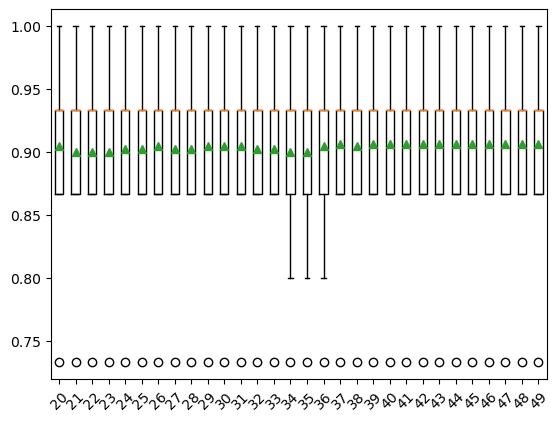

In [22]:
evaluatePCA(X_test_shuffled, y_test)

As seen in the above plot, the data with shuffled columns also yields similar accuracy scores as PCA doesn't consider the order (order matters here as the data is a time series) which is flawed for this particular dataset.<br><br>
So, we need to consider the bias of a column towards its previous columns.

## Alternative approaches to consider time series

### Using RNN

### 1. Using LSTM

In [23]:
from keras.models import Sequential
import keras.layers as kerasLayers
import keras

In [24]:
model = Sequential()

#### 4 Layers of LSTM to understand short term dependencies and further layers for the long term dependencies

In [25]:
def initFit4LayerLSTM(X, y):    
    model.add(kerasLayers.LSTM(units = 50, return_sequences = True, input_shape = (X.shape[1], 1)))
    model.add(kerasLayers.Dropout(0.2))

    model.add(kerasLayers.LSTM(units = 50, return_sequences = True))
    model.add(kerasLayers.Dropout(0.2))

    model.add(kerasLayers.LSTM(units = 50, return_sequences = True))
    model.add(kerasLayers.Dropout(0.2))

    model.add(kerasLayers.LSTM(units = 50))
    model.add(kerasLayers.Dropout(0.2))

    model.add(kerasLayers.Dense(units = 5, activation='softmax'))

    model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy')

    model.fit(X, y, epochs = 100, batch_size = 32)

In [26]:
initFit4LayerLSTM(X_train, y_train)

Epoch 1/100
11/11 [==============================] - 13s 315ms/step - loss: 1.4129
Epoch 2/100
11/11 [==============================] - 3s 318ms/step - loss: 0.7918
Epoch 3/100
11/11 [==============================] - 3s 293ms/step - loss: 0.4668
Epoch 4/100
11/11 [==============================] - 3s 305ms/step - loss: 0.3361
Epoch 5/100
11/11 [==============================] - 3s 296ms/step - loss: 0.2605
Epoch 6/100
11/11 [==============================] - 3s 316ms/step - loss: 0.2510
Epoch 7/100
11/11 [==============================] - 4s 342ms/step - loss: 0.2328
Epoch 8/100
11/11 [==============================] - 3s 293ms/step - loss: 0.2152
Epoch 9/100
11/11 [==============================] - 3s 289ms/step - loss: 0.2060
Epoch 10/100
11/11 [==============================] - 3s 279ms/step - loss: 0.1992
Epoch 11/100
11/11 [==============================] - 3s 302ms/step - loss: 0.2021
Epoch 12/100
11/11 [==============================] - 3s 292ms/step - loss: 0.1937
Epoch 13/100

11/11 [==============================] - 3s 302ms/step - loss: 0.0822
Epoch 100/100
11/11 [==============================] - 3s 278ms/step - loss: 0.0794


In [27]:
def predict4LayerLSTM(X):
    y_pred = model.predict(X)
    y_pred = np.argmax(y_pred, axis=1)
    return y_pred

In [28]:
y_predicted = predict4LayerLSTM(X_test)

5/5 [==============================] - 2s 74ms/step


In [29]:
def parametersCalculation(y_pred, y_true):
    # Calculate accuracy
    accuracy = np.mean(y_pred == y_true)

    # Calculate true positives, false positives, true negatives, false negatives
    tp = np.sum((y_pred == 1) & (y_test == 1))
    fp = np.sum((y_pred == 1) & (y_test == 0))
    tn = np.sum((y_pred == 0) & (y_test == 0))
    fn = np.sum((y_pred == 0) & (y_test == 1))

    # Calculate precision
    precision = tp / (tp + fp)

    # Calculate recall
    recall = tp / (tp + fn)

    # Calculate F1-score
    f1_score = 2 * (precision * recall) / (precision + recall)

    # Print the calculated metrics
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:", f1_score)

In [30]:
parametersCalculation(y_predicted, y_test)

Accuracy: 0.9466666666666667
Precision: 1.0
Recall: 1.0
F1-score: 1.0


In [31]:
from sklearn.metrics import confusion_matrix

def displayCofusion(y_true, y_pred):
    # Calculate the confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Plot the confusion matrix as a heatmap
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.colorbar()
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.xticks(np.arange(5), ['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5'])
    plt.yticks(np.arange(5), ['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5'])
    plt.title('Confusion Matrix')
    plt.show()

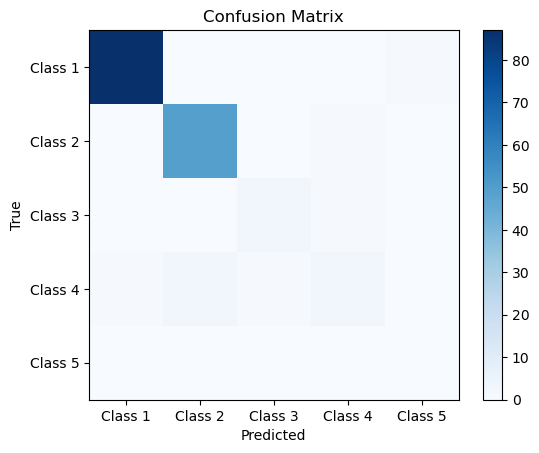

In [32]:
displayCofusion(y_test, y_predicted)

### Testing the LSTM's prediction for X_test with shuffled columns

In [33]:
y_predicted_shuffled = predict4LayerLSTM(X_test_shuffled)

5/5 [==============================] - 0s 73ms/step


In [34]:
parametersCalculation(y_predicted_shuffled, y_test)

Accuracy: 0.16
Precision: 0.0
Recall: 0.0
F1-score: nan


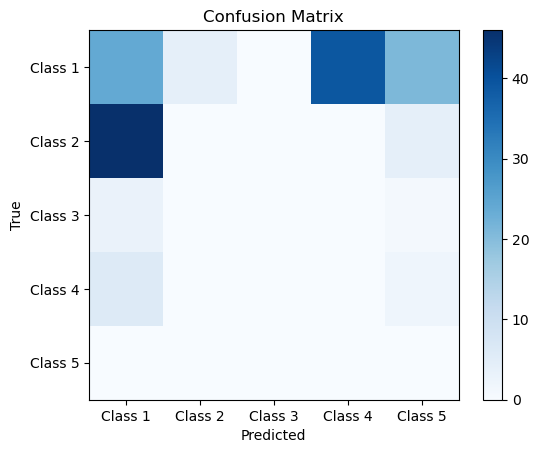

In [35]:
displayCofusion(y_test, y_predicted_shuffled)

The simulation of causality or creating the bias towards the previous data is working as expected as shuffling of the columns did not yield the same result as the unshuffled data. The accuracy is very low meaning that a dependency has been created between the columns.

### Testing the robustness by randomly setting values to NaN

In [36]:
X_train.isna().sum()

att1      0
att2      0
att3      0
att4      0
att5      0
         ..
att136    0
att137    0
att138    0
att139    0
att140    0
Length: 140, dtype: int64

In [37]:
def randomDropElementsDf(X_data, retainFrac=0.1):
    
    X_with_missing_data = X_data.copy()
    rowShape, colShape = X_with_missing_data.shape

    # making a array randomly of same size as data of bool type
    mask = np.zeros(rowShape*colShape, dtype=bool)

    rowShape, colShape


    # marking first n indexes as true
    mask[:round(rowShape*retainFrac)] = True

    # shuffling the mask
    np.random.shuffle(mask)
    mask = mask.reshape(rowShape, colShape)

    # applying mask to the data
    X_with_missing_data[mask] = np.nan
    
    return X_with_missing_data

Dropping random values in the test data

Percentage of test values dropped: 20.0
5/5 [==============================] - 0s 92ms/step
Accuracy: 0.9066666666666666
Precision: 1.0
Recall: 0.86
F1-score: 0.924731182795699


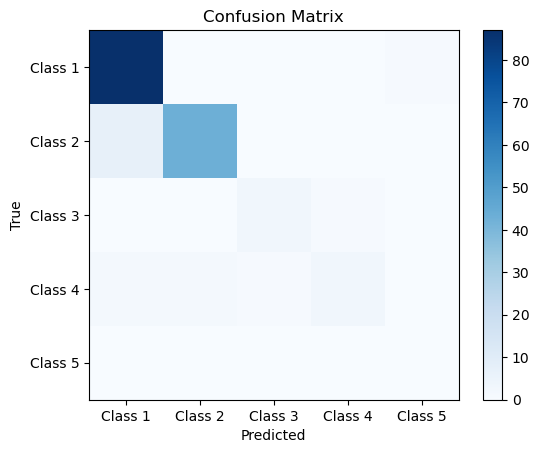

Percentage of test values dropped: 40.0
5/5 [==============================] - 0s 100ms/step
Accuracy: 0.9133333333333333
Precision: 1.0
Recall: 0.9183673469387755
F1-score: 0.9574468085106383


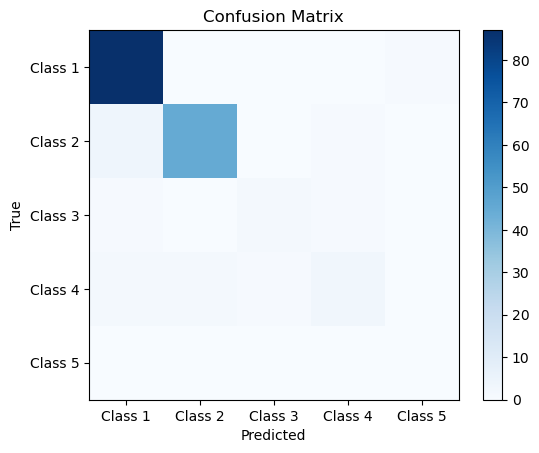

Percentage of test values dropped: 60.0
5/5 [==============================] - 0s 73ms/step
Accuracy: 0.9133333333333333
Precision: 1.0
Recall: 0.9183673469387755
F1-score: 0.9574468085106383


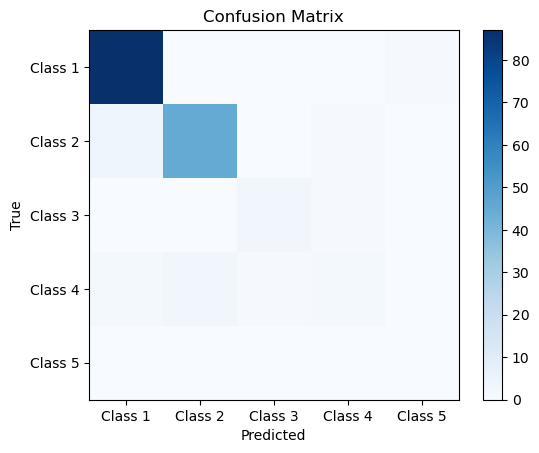

In [38]:
i=0
X_test_missing_data=[]
for dropFrac in [0.2, 0.4, 0.6]:
    print("Percentage of test values dropped:", dropFrac*100)
    X_test_missing_data.append(randomDropElementsDf(X_test))

    y_predicted = predict4LayerLSTM(X_test_missing_data[i])
    parametersCalculation(y_predicted, y_test)
    displayCofusion(y_test, y_predicted)
    i+=1

Dropping random values in the training data

Epoch 1/100
11/11 [==============================] - 13s 252ms/step - loss: nan
Epoch 2/100
11/11 [==============================] - 3s 307ms/step - loss: nan
Epoch 3/100
11/11 [==============================] - 3s 282ms/step - loss: nan
Epoch 4/100
11/11 [==============================] - 3s 309ms/step - loss: nan
Epoch 5/100
11/11 [==============================] - 3s 300ms/step - loss: nan
Epoch 6/100
11/11 [==============================] - 3s 297ms/step - loss: nan
Epoch 7/100
11/11 [==============================] - 3s 297ms/step - loss: nan
Epoch 8/100
11/11 [==============================] - 3s 294ms/step - loss: nan
Epoch 9/100
11/11 [==============================] - 3s 285ms/step - loss: nan
Epoch 10/100
11/11 [==============================] - 3s 298ms/step - loss: nan
Epoch 11/100
11/11 [==============================] - 3s 280ms/step - loss: nan
Epoch 12/100
11/11 [==============================] - 3s 295ms/step - loss: nan
Epoch 13/100
11/11 [============================

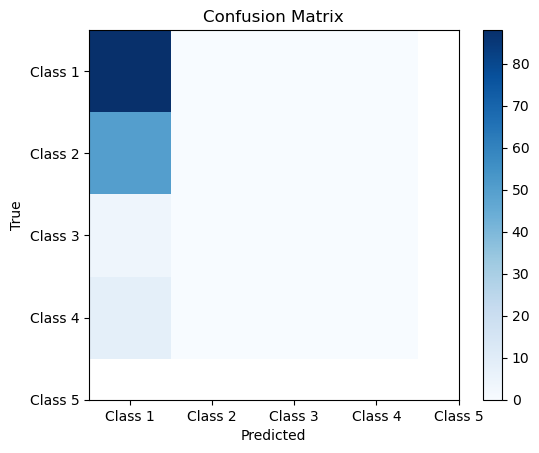

In [39]:
X_train_missing_data = randomDropElementsDf(X_train)

model = Sequential()
initFit4LayerLSTM(X_train_missing_data, y_train)
y_predicted = predict4LayerLSTM(X_test)
parametersCalculation(y_predicted, y_test)
displayCofusion(y_test, y_predicted)

The accuracy did not vary when some of the data points were dropped and so the model is found to be robust for missing data.

### 2. Using GRU

In [40]:
model = Sequential()

In [41]:
def initFit4LayerGRU(X, y):    
    model.add(kerasLayers.GRU(units = 50, return_sequences = True, input_shape = (X.shape[1], 1)))
    model.add(kerasLayers.Dropout(0.2))

    model.add(kerasLayers.GRU(units = 50, return_sequences = True))
    model.add(kerasLayers.Dropout(0.2))

    model.add(kerasLayers.GRU(units = 50, return_sequences = True))
    model.add(kerasLayers.Dropout(0.2))

    model.add(kerasLayers.GRU(units = 50))
    model.add(kerasLayers.Dropout(0.2))

    model.add(kerasLayers.Dense(units = 5, activation='softmax'))

    model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy')

    model.fit(X, y, epochs = 100, batch_size = 32)

In [42]:
def predict4LayerGRU(X):
    y_pred = model.predict(X)
    y_pred = np.argmax(y_pred, axis=1)
    return y_pred

In [43]:
initFit4LayerGRU(X_train, y_train)

Epoch 1/100
11/11 [==============================] - 14s 315ms/step - loss: 1.1383
Epoch 2/100
11/11 [==============================] - 4s 338ms/step - loss: 0.5540
Epoch 3/100
11/11 [==============================] - 4s 327ms/step - loss: 0.4297
Epoch 4/100
11/11 [==============================] - 4s 333ms/step - loss: 0.3659
Epoch 5/100
11/11 [==============================] - 4s 333ms/step - loss: 0.3401
Epoch 6/100
11/11 [==============================] - 3s 314ms/step - loss: 0.3149
Epoch 7/100
11/11 [==============================] - 4s 331ms/step - loss: 0.2857
Epoch 8/100
11/11 [==============================] - 4s 319ms/step - loss: 0.2706
Epoch 9/100
11/11 [==============================] - 4s 340ms/step - loss: 0.2481
Epoch 10/100
11/11 [==============================] - 4s 344ms/step - loss: 0.2379
Epoch 11/100
11/11 [==============================] - 3s 301ms/step - loss: 0.2139
Epoch 12/100
11/11 [==============================] - 4s 321ms/step - loss: 0.2165
Epoch 13/100

11/11 [==============================] - 5s 461ms/step - loss: 0.0569
Epoch 100/100
11/11 [==============================] - 4s 332ms/step - loss: 0.0617


In [44]:
y_predicted = predict4LayerGRU(X_test)

5/5 [==============================] - 2s 86ms/step


In [45]:
parametersCalculation(y_predicted, y_test)

Accuracy: 0.9533333333333334
Precision: 1.0
Recall: 1.0
F1-score: 1.0


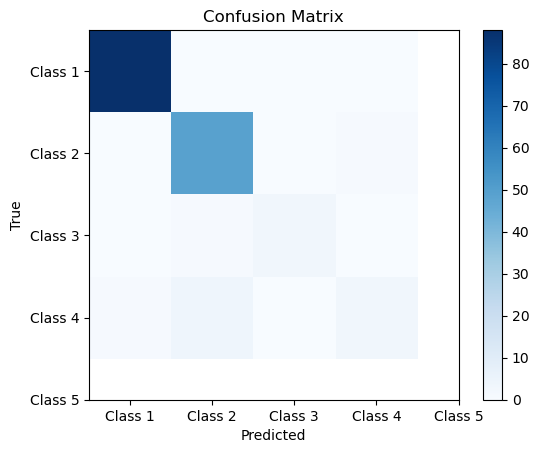

In [46]:
displayCofusion(y_test, y_predicted)

### Testing the GRU's prediction for X_test with shuffled columns

In [47]:
y_predicted_shuffled = predict4LayerLSTM(X_test_shuffled)

5/5 [==============================] - 0s 94ms/step


In [48]:
parametersCalculation(y_predicted_shuffled, y_test)

Accuracy: 0.02666666666666667
Precision: 0.0
Recall: 0.0
F1-score: nan


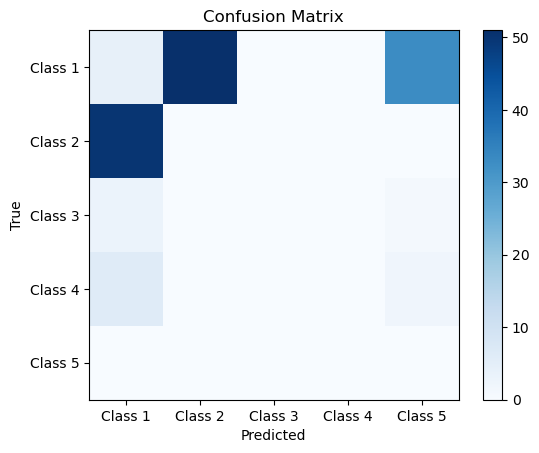

In [49]:
displayCofusion(y_test, y_predicted_shuffled)

The LSTM implementation seems to be more reliable compared to that of GRU and the properties of LSTM are more suitable (long term memeory) for this use case.

### Providing the time series as a vector of various sizes

In [ ]:
# time_series_array = np.empty(X.shape[0], dtype=object)
# time_series_array = (X.values).astype(np.float32)
# time_series_array=np.asarray(time_series_array).astype(np.float32)

In [ ]:
# X_vector = pd.DataFrame(index=range(time_series_array.shape[0]), columns=range(1))
# print(X_vector, time_series_array.shape[0],time_series_array.shape[1])
# for i in range(time_series_array.shape[0]):
#     print(i)
#     X_vector.loc[i,0] = time_series_array[i]

In [ ]:
# X_vector_train, X_vector_test, y_vector_train, y_vector_test = train_test_split(X_vector, y, test_size = 0.3, random_state = 42)

In [ ]:
# model = Sequential()
# initFit4LayerGRU(X_vector_train, y_vector_train)

### ARIMA (autoregressive integrated moving average) Modelling

## Other Approaches

In [ ]:
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.svm import SVC

from fastdtw import fastdtw

### Dynamic Time Warping SVM (DTW-SVM)

In [ ]:
#X_train_dtw = np.empty([])

# Define a custom distance function using DTW
def dtw_distance(x, y):
    distance, _ = fastdtw(x, y)
    return distance

X_train_array = np.array(X_train)

# Compute pairwise distance matrix using DTW distance
n_samples = len(X_train_array)
X_train_array = np.zeros((n_samples, n_samples))
X_train_dtw = np.empty([n_samples, n_samples])
for i in range(n_samples):
    for j in range(i, n_samples):
        #print(X_train_array)
        dist = dtw_distance(X_train_array[i], X_train_array[j])
        X_train_dtw[i, j] = dist
        X_train_dtw[j, i] = dist

# Dynamic Time Warping SVM (DTW-SVM)
clf_dtwsvm = SVC(kernel="precomputed")
clf_dtwsvm.fit(X_train_dtw, y_train)

In [ ]:
X_test_array = np.array(X_test)

# Compute pairwise distance matrix using DTW distance
n_samples = len(X_test_array)
X_test_array = np.zeros((n_samples, n_samples))
for i in range(n_samples):
    for j in range(i, n_samples):
        #print(X_train_array)
        dist = dtw_distance(X_test_array[i], X_test_array[j])
        X_test_dtw[i, j] = dist
        X_test_dtw[j, i] = dist

y_pred = svm_clf.predict(X_test_dtw)

### Support Vector Data Description for Time Series (SVDD-TS)

In [ ]:
import sys
sys.path.append("..")

from src.BaseSVDD import BaseSVDD
from sklearn.decomposition import KernelPCA


# number of the dimensionality
kpca = KernelPCA(n_components=2, kernel="rbf", gamma=0.1, fit_inverse_transform=True)
X_kpca = kpca.fit_transform(X_train)

# fit the SVDD model
svdd = BaseSVDD(C=0.9, gamma=10, kernel='rbf', display='on')

# fit and predict
svdd.fit(X_kpca,  y_train)
y_test_predict = svdd.predict(X_kpca, y)

# plot the distance curve
radius = svdd.radius
distance = svdd.get_distance(X_kpca)
svdd.plot_distance(radius, distance)

# plot the boundary
svdd.plot_boundary(X_kpca,  y)

In [ ]:
import numpy as np
from sklearn.decomposition import KernelPCA
from sklearn.svm import OneClassSVM


# create 100 points with 5 dimensions
X = np.r_[np.random.randn(50, 5) + 1, np.random.randn(50, 5)]
y = np.append(np.ones((50, 1), dtype=np.int64), 
              -np.ones((50, 1), dtype=np.int64),
              axis=0)

# number of the dimensionality
kpca = KernelPCA(n_components=2, kernel="rbf", gamma=0.1, fit_inverse_transform=True)
X_kpca = kpca.fit_transform(X)

# fit the OneClassSVM model
svm = OneClassSVM(nu=0.1, kernel='rbf', gamma=0.1)

# fit and predict
svm.fit(X_kpca)
y_test_predict = svm.predict(X_kpca)

# plot the distance curve
radius = np.sqrt(-svm.intercept_ / svm.nu)
distance = svm.decision_function(X_kpca)
plt.plot(distance)

# plot the boundary
plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=y_test_predict, cmap='coolwarm', alpha=0.5)
xx, yy = np.meshgrid(np.linspace(-5, 5, 500), np.linspace(-5, 5, 500))
Z = svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, levels=[-radius, 0, radius], colors='k', linestyles=['--', '-', '--'])
plt.show()


It takes a very long time to run.

### Using RandomForest for Time series classiffication

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestClassifier
from pandas import DataFrame
from pandas import concat
from matplotlib import pyplot

# transform a time series dataset into a supervised learning dataset
def series_to_supervised(X_train_RF, y_train_RF, n_in=1, n_out=1, dropnan=True):
    """
    Transform a time series dataset into a supervised learning dataset.

    Arguments:
    X_train -- input features of the training set, array-like of shape (n_samples, n_features)
    y_train -- target variable of the training set, array-like of shape (n_samples,)
    n_in -- number of lag observations as input (X), default=1
    n_out -- number of observations as output (y), default=1
    dropnan -- boolean value whether or not to drop rows with NaN values, default=True

    Returns:
    agg.values -- a supervised learning dataset in the format of X, y.
    """
    n_vars = X_train.shape[1] if X_train.ndim > 1 else 1
    df_X = DataFrame(X_train_RF)
    df_y = DataFrame(y_train_RF)
    cols_X, cols_y = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols_X.append(df_X.shift(i))
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols_y.append(df_y.shift(-i))
    # put it all together
    cols = cols_X + cols_y
    agg = concat(cols, axis=1)
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg.values

# fit an random forest model and make a one step prediction
def random_forest_forecast(X_train_RF, y_train_RF, X_test_RF):
#     history[i][0] is X_train_RF
#     history[i][1] is y_train_RF
    # fit model
    model = RandomForestClassifier(n_estimators=1000)
    model.fit(X_train_RF, y_train_RF)
    # make a one-step prediction
    y_hat = model.predict([X_test_RF])
    return y_hat[0]

# walk-forward validation for univariate data
def walk_forward_validation(X_train_RF, y_train_RF, X_test_RF, y_test_RF):
    predictions = list()
    
    # seed history with training dataset
    X_history = [X_train_RF.loc[i,:] for i in X_train_RF.index.values.tolist()]
    y_history = [y_train_RF[i] for i in X_train_RF.index.values.tolist()]
    
    # step over each time-step in the test set
    for i in X_test_RF.index.values.tolist():

        # fit model on history and make a prediction
        y_hat = random_forest_forecast(X_history, y_history, X_test_RF.loc[i,:])
        # store forecast in list of predictions
        predictions.append(y_hat)
        # add actual observation to history for the next loop
        X_history.append(X_test_RF.loc[i,:])
        y_history.append(y_test_RF[i])
        # summarize progress
        print('>expected=%.1f, predicted=%.1f' % (y_test_RF[i], y_hat))
    # estimate prediction error
    error = mean_absolute_error(y_test_RF, predictions)
    return error, y_test_RF, predictions

# transform the time series data into supervised learning
data = series_to_supervised(X_train, y_train)
# evaluate
errorVal, y_true, y_pred = walk_forward_validation(X_train, y_train, X_test, y_test)
print('Mean Absolute Error: %.3f' % errorVal)
# plot expected vs predicted
# pyplot.plot(y_true, label='Expected')
# pyplot.plot(y_pred, label='Predicted')
# pyplot.legend()
# pyplot.show()

In [ ]:
displayCofusion(y_true, y_pred)

In [ ]:
errorVal, y_true, y_pred = walk_forward_validation(X_train, y_train, X_test_shuffled, y_test)

In [ ]:
errorVal

In [ ]:
displayCofusion(y_true, y_pred)

#### The error doesn't go down by a lot and so seems like the dependency is not considered.

In [ ]:
rowShape, colShape = X_train_missing_data.shape

# making a array randomly of same size as data of bool type
mask = np.zeros(rowShape*colShape, dtype=bool)

rowShape, colShape

In [ ]:
# marking first n indexes as true
mask[:round(rowShape*0.9)] = True
 
# shuffling the mask
np.random.shuffle(mask)
mask = mask.reshape(rowShape, colShape)
 
# applying mask to the data
X_train_missing_data[mask] = np.nan

In [ ]:
X_train_missing_data

In [ ]:
model = Sequential()
initFit4LayerLSTM(X_train_missing_data, y_train)
y_predicted = predict4LayerLSTM(X_test)
parametersCalculation(y_predicted, y_test)
displayCofusion(y_test, y_predicted)